# Исследование данных по пользователям сервиса аренды самокатов

**Описание проекта**

Имеются данные о некоторых пользователях из нескольких городов сервиса аренды самокатов GoFast, а также об их поездках.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. 

Сервисом можно пользоваться:
- без подписки:
абонентская плата отсутствует;
стоимость одной минуты поездки — 8 рублей;
стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra:
абонентская плата — 199 рублей в месяц;
стоимость одной минуты поездки — 6 рублей;
стоимость старта — бесплатно.

Для выявления точек роста бизнеса, необходимо проанализировать и сравнить данные по пользователям с подпиской и без нее, а также проверить следующие гипотезы:

- пользователи с подпиской тратят больше времени на поездки;
- среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров;
- помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

**Описание данных**

В основных данных есть информация о пользователях, их поездках и подписках.

Пользователи — `users_go.csv`

* `user_id` - уникальный идентификатор пользователя
* `name` - имя пользователя
* `age` - возраст
* `city` - город
* `subscription_type` - тип подписки (free, ultra)

Поездки — `rides_go.csv`

* `user_id` - уникальный идентификатор пользователя
* `distance` - расстояние, которое пользователь проехал в текущей сессии (в метрах)
* `duration` - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
* `date` - дата совершения поездки

Подписки — `subscriptions_go.csv`

* `subscription_type` - тип подписки
* `minute_price` - стоимость одной минуты поездки по данной подписке
* `start_ride_price` - стоимость начала поездки
* `subscription_fee` - стоимость ежемесячного платежа	

#### Шаг 1. Загрузка данных

1.1 Импортируем необходимые библиотеки и считаем CSV-файлы с данными, сохраним их в датафреймы

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
users = pd.read_csv('/datasets/users_go.csv')

In [3]:
rides = pd.read_csv('/datasets/rides_go.csv')

In [4]:
subs = pd.read_csv('/datasets/subscriptions_go.csv')

1.2 Выведем первые строки каждого набора данных. Изучим общую информацию о каждом датафрейме.

In [5]:
users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [7]:
rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [8]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [9]:
#посмотрим, какой временной промежуток охватывают данные
print('Период:', pd.to_datetime(rides['date'], format='%Y-%m-%d').dt.date.min(), '-', 
      pd.to_datetime(rides['date'], format='%Y-%m-%d').dt.date.max())

Период: 2021-01-01 - 2021-12-30


In [10]:
subs.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [11]:
subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


**Вывод:** В данных нет пропущенных значений, соблюден единый стиль в названиях колонок, содержание датафреймов соответствует заявленному в описании данных. В датафреймах `users` и `subs` типы данных во всех колонках определены верно, в датафрейме `rides` дата определена как object, необходимо привести к типу datetime.

#### Шаг 2. Предобработка данных

2.1 Приведем столбец `date` датафрейма `rides` к типу даты pandas.

In [12]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

2.2 Создадим новый столбец с номером месяца на основе столбца `date`.

In [13]:
rides['month'] = pd.to_datetime(rides['date'], format='%Y-%m-%d').dt.month

In [14]:
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [15]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


2.3 Проверим наличие пропущенных значений, аномалий и дубликатов в датафреймах. Обработаем их, если такие значения присутствуют.

In [16]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [17]:
users.duplicated().sum()

31

In [18]:
users = users.drop_duplicates().reset_index(drop=True)

In [19]:
users.duplicated().sum()

0

In [20]:
#проверим наличие аномальных значений возраста
users['age'].sort_values().unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 43])

In [21]:
#проверим наличие неявных дубликатов
users['city'].sort_values().unique()

array(['Екатеринбург', 'Краснодар', 'Москва', 'Омск', 'Пятигорск',
       'Ростов-на-Дону', 'Сочи', 'Тюмень'], dtype=object)

In [22]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [23]:
rides.duplicated().sum()

0

In [24]:
subs.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [25]:
subs.duplicated().sum()

0

**Вывод:** В ходе предобработки данных привели столбец `date` датафрейма `rides` к типу даты pandas, вывели месяц в отдельный столбец. Пропущенных значений в данных нет, в датафрейме `users` обнаружили и устранили строки-дубликаты. Убедились в отсутствии неявных дубликатов в `city` и аномальных значений в `age`. Однако обнаружили данные по пользователям в возрасте 12-17 лет, при том, что у сервисов проката действует возрастное ограничение, и арендовать электросамокат могут только совершеннолетние граждане. Вероятно, наличие таких данных техническая ошибка.

#### Шаг 3. Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках.

3.1 Частота встречаемости городов

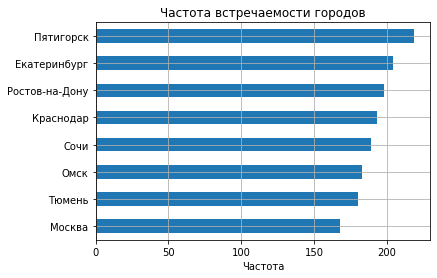

In [26]:
users['city'].value_counts(ascending=True).plot.barh(grid=True)
plt.title('Частота встречаемости городов')
plt.xlabel('Частота')
plt.show()

In [27]:
users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

Данные по городам в выборке представлены достаточно равномерно. 168 пользователей из Москвы - это наименее представленный в выборке город, примерно по 180 пользователей из Тюмени и Омска, примерно по 200 - из Сочи, Краснодара, Ростова-на-Дону и Екатеринбурга. Наиболее часто встречаются данные по пользователям из Пятигорска - 219 раз.

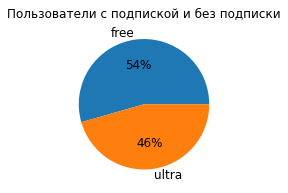

In [28]:
(users['subscription_type'].value_counts()
 .plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize':12}, figsize=(4, 3), grid=True).axes.yaxis.set_visible(False))
plt.title('Пользователи с подпиской и без подписки')
plt.show()

Пользователи с подпиской составляют 46% выборки, пользователи без подписки - 54%.

3.3 Возраст пользователей

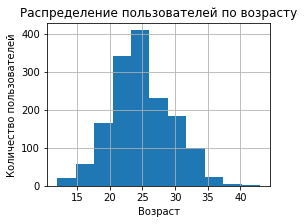

In [29]:
users['age'].plot(kind='hist', bins=11, figsize=(4, 3), grid=True)
plt.title('Распределение пользователей по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

Наибольшее количество пользователей самокатов (около 750 человек) - в возрасте 20-25 лет, примерно 500 пользователей в возрасте 25-35 лет, около 200 пользователей 15-20 лет, пользователей младше 15 и старше 35 лет крайне мало - около 50 человек в совокупности. 

3.4 Расстояние, которое пользователь преодолел за одну поездку

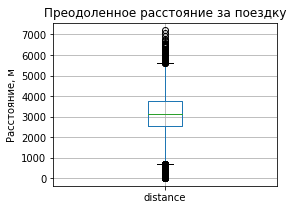

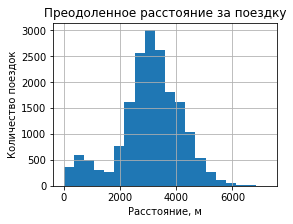

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [30]:
rides['distance'].plot.box(figsize=(4, 3), grid=True)
plt.title('Преодоленное расстояние за поездку')
plt.ylabel('Расстояние, м')
plt.show()

rides['distance'].plot(kind='hist', bins=20, figsize=(4, 3), grid=True)
plt.title('Преодоленное расстояние за поездку')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.show()

rides['distance'].describe()

Самая распространенная дистанция при поездке на самокате - 3 км, это можно увидеть как по графику, так и по значениям среднего и медианы. Слева и справа от этого значения близко к нормальному распределены поездки с расстояниями от 2 до 5 км. Поездки дальше 5 км стремятся к нулю. На промежутке от 0 до 1 км есть небольшой пик, вероятно, связанный с использованием самокатов как транспорта последней мили.

3.5 Продолжительность поездок

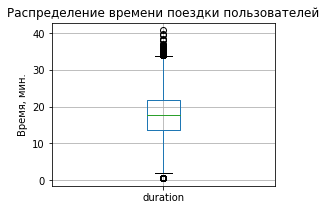

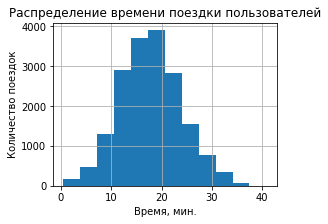

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [31]:
rides['duration'].plot.box(figsize=(4, 3), grid=True)
plt.title('Распределение времени поездки пользователей')
plt.ylabel('Время, мин.')
plt.show()

rides['duration'].plot(kind='hist', bins=12, figsize=(4, 3), grid=True)
plt.title('Распределение времени поездки пользователей')
plt.xlabel('Время, мин.')
plt.ylabel('Количество поездок')
plt.show()

rides['duration'].describe()

По гистограмме видим распределение, близкое к нормальному, с центральным значением около 18 минут. Около 3000 поездок совершено в временном промежутке 10-15 минут, примерно столько же прездок занимают время 20-25 минут. Исходя из данных графика, поездки меньше 3 минут можно считать аномально короткими, хотя при средней скорости 15 км/ч за это время можно проехать 750 м. Поездки дольше 35 минут также выбиваются за пределы допустимых значений. При этом максимальное значение составляет 41 минуту, что является вполне реалистичным значением, учитывая отсутствие ограничений по времени аренды и представленность в прокате самокатов с высокой емкостью батареи.

In [32]:
#посмотрим среднее расстояние для поездок менее 2 минут
rides.query('duration <= 2').pivot_table(index='duration', values='distance', aggfunc=['mean', 'count'])

,mean,count
,distance,distance
duration,,
0.5,5113.176549,95


In [33]:
#рассчитаем, какое расстояние можно проехать при разрешенной максимальной скорости 25 км/ч (6.94 м/с):
6.94 * 30

208.20000000000002

Из описания и предобработки данных мы знаем, что в колонке `duration` содержатся непрерывные числовые данные. Однако при фильтрации коротких поездок длительностью менее 2 минут, мы обнаруживаем только одно значение для 95 поездок - 0.5, что эквивалентно 30 секундам, при этом среднее расстояние для таких поездок больше 5 км, а самокат при максимальной разрешенной скорости 25 км/ч может проехать только 208 м - почти в 25 раз меньше. Очевидно, в этих строках ошибка либо в расстояниии, либо в продолжительности поездки.

**Вывод**: Данные по городам в выборке представлены достаточно равномерно. Наиболее часто встречаются данные по пользователям из Пятигорска - 219 раз, наименее представленный в выборке город (168 пользователей) - Москва.

Пользователи с подпиской составляют 46% выборки, пользователи без подписки - 54%.

Наибольшее количество пользователей самокатов (около 750 человек) - в возрасте 20-25 лет, примерно 500 пользователей в возрасте 25-35 лет, около 200 пользователей 15-20 лет, пользователей младше 15 и старше 35 лет крайне мало - около 50 человек в совокупности. Стоит обратить внимание, что сервисы кикшеринга с самого появления имеют возрастное ограничение для пользователей - арендовать самокат можно с 18 лет - соответственно, возраст пользователей младше этого возраста указан ошибочно.

Чаще всего пользователи преодолевают на самокате расстояние 3 км, поездки дальше 5 км стремятся к нулю. На промежутке от 0 до 1 км есть небольшой пик, вероятно, связанный с использованием самокатов как транспорта последней мили.

В среднем пользователи тратят на поездку от 10 до 25 минут. Поездки дольше 35 минут выбиваются за пределы допустимых значений на графике, но максимальное значение составляет 41 минуту, что является вполне реалистичным значением, учитывая отсутствие ограничений по времени аренды и представленность в прокате самокатов с высокой емкостью батареи.

Ориентируясь на "ящик с усами", поездки меньше 3 минут можно считать аномально короткими, хотя при средней скорости 15 км/ч за это время можно проехать 750 м, а на максимальной - более 1200 м. При фильтрации коротких поездок длительностью менее 2 минут, обнаружили, что 95 поездок длятся 30 секунд, при этом среднее расстояние для таких поездок больше 5 км. В реальности же самокат при максимальной разрешенной скорости 25 км/ч может проехать за это время 208 м - почти в 25 раз меньше. Очевидно, в этих строках приведены ошибочные данные по расстоянию или продолжительности поездки.

#### Шаг 4. Объединение данных

4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуемся методом merge()

In [34]:
data = (
    users
    .merge(rides, on='user_id', how='left')
    .merge(subs, on='subscription_type', how='left')
)

In [35]:
#посмотрим результат операции
data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [36]:
len(data) == len(rides)

True

In [37]:
data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

4.2 Создадим ещё два датафрейма, основывыясь на `data`:

- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.

In [38]:
data_free = data.query('subscription_type == "free"')

In [39]:
data_ultra = data.query('subscription_type == "ultra"')

4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

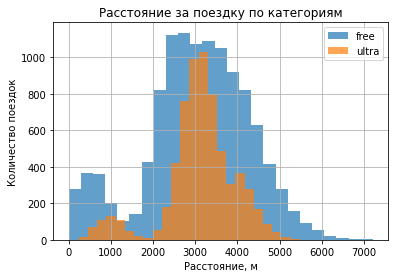

In [40]:
ax = data_free['distance'].plot(kind='hist', bins=25, linewidth=5, alpha=0.7, label='free')
data_ultra['distance'].plot(kind='hist', bins=25, linewidth=5, alpha=0.7, label='ultra', ax=ax, grid=True)
plt.title('Расстояние за поездку по категориям')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.legend()

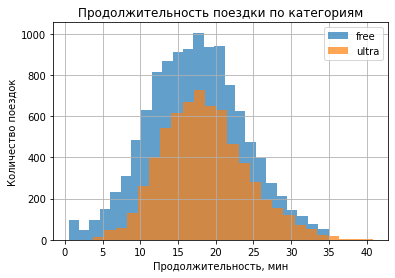

In [41]:
ax = data_free['duration'].plot(kind='hist', bins=25, linewidth=5, alpha=0.7, label='free')
data_ultra['duration'].plot(kind='hist', bins=25, linewidth=5, alpha=0.7, label='ultra', ax=ax, grid=True)
plt.title('Продолжительность поездки по категориям')
plt.xlabel('Продолжительность, мин')
plt.ylabel('Количество поездок')
plt.legend()

**Вывод:** Создали новые датафреймы c данными о пользователях без подписки и с данными о пользователях с подпиской. Проверили распределение данных по этим категориям: и по расстоянию за поездку, и по продолжительности поездки данные распределены достаточно равномерно для пользователей с подпиской и без нее. Различие в количестве наблюдений незначительное, поэтому нет оснований считать, что дисперсии выборок различны.

#### Шаг 5. Подсчёт выручки

5.1 Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [42]:
#округлим продолжительность каждой поездки до следующего целого числа
data['duration'] = np.ceil(data['duration']).astype(int)

In [43]:
user_month = (data
              .pivot_table(
                  index=['user_id', 'month', 'subscription_type', 'minute_price','start_ride_price', 'subscription_fee'], 
                  values=['distance', 'duration'], 
                  aggfunc=['sum', 'count'])
             )
user_month.columns = ['distance', 'duration', 'count', 'rides_count']

In [44]:
#удалим индексы, чтобы сводная приняла табличный вид
#удалим дублированный столбец по количеству поездок
user_month = user_month.reset_index().drop('count', axis=1)

In [45]:
#выведем получившуюся таблицу
user_month.head()

,user_id,month,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,rides_count
0,1,1,ultra,6,0,199,7027.511294,42,2
1,1,4,ultra,6,0,199,754.159807,7,1
2,1,8,ultra,6,0,199,6723.470560,46,2
3,1,10,ultra,6,0,199,5809.911100,32,2
4,1,11,ultra,6,0,199,7003.499363,56,3


5.2 Добавим в датафрейм столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. 

Помесячную выручку рассчитаем по формуле: стоимость старта поездки ×  количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки 

In [46]:
#рассчитаем помесячную выручку по каждому пользователю
user_month['revenue'] = (
    user_month['start_ride_price'] * user_month['rides_count'] + 
    user_month['minute_price'] * user_month['duration'] + user_month['subscription_fee'])

In [47]:
#выведем конечную таблицу для проверки
user_month.head()

,user_id,month,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,rides_count,revenue
0,1,1,ultra,6,0,199,7027.511294,42,2,451
1,1,4,ultra,6,0,199,754.159807,7,1,241
2,1,8,ultra,6,0,199,6723.470560,46,2,475
3,1,10,ultra,6,0,199,5809.911100,32,2,391
4,1,11,ultra,6,0,199,7003.499363,56,3,535


**Вывод:** Создали новый датафрейм `user_month` с данными по количеству поездок, суммарному расстоянию и времени для каждого пользователя за каждый месяц. Рассчитали помесячную выручку по каждому пользователю, эти данные пригодятся для проверки гипотез на шаге 6.

#### Шаг 6. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки. 

Сформулируем нулевую и альтернативные гипотезы:

$H_{0}$: Среднее время поездки пользователей с подпиской равно среднему времени поездки пользователей без подписки

$H_{1}$: Среднее время поездки пользователей с подпиской больше, чем среднее время поездки пользователей без подписки

Для проверки гипотезы используем двухвыборочный t-тест для независимых выборок. Исходя из графика распределения продолжительности поездок по категориям, будем считать, что дисперсии рассматриваемых выборок равны и не будем обозначать в t-тесте `equal_var`, поскольку по умолчанию он принимает значение `True`.

In [48]:
#выведем среднее значение для обеих выборок
print('Среднее время с подпиской:', np.mean(data_ultra['duration']))
print('Среднее время без подписки:', np.mean(data_free['duration']))

alpha = 0.05

results = st.ttest_ind(
    data_ultra['duration'],
    data_free['duration'],
    alternative='greater'
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу в пользу альтернативной')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее время с подпиской: 18.54198516280583
Среднее время без подписки: 17.39090929866399
p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу в пользу альтернативной


**Вывод:** Значение p-value меньше выбранного уровня значимости, соответственно, равенство средней длительности поездки пользователей с подпиской и без нее маловероятно. Поэтому есть основания считать, что среднее время поездки пользователей с подпиской больше, чем среднее время поездки пользователей без подписки.

6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

Сформулируем нулевую и альтернативную гипотезы:

$H_{0}$: Среднее преодоленное расстояние пользователей с подпиской за одну поездку равно 3130 м

$H_{1}$: Среднее преодоленное расстояние пользователей с подпиской за одну поездку больше 3130 м

Для проверки гипотезы используем одновыборочный t-тест

In [49]:
print('Среднее расстояние пользователей с подпиской:', np.mean(data_ultra['distance']))

value = 3130
alpha = 0.05

results = st.ttest_1samp(
    data_ultra['distance'],
    value,
    alternative='greater'
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу в пользу альтернативной')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее расстояние пользователей с подпиской: 3115.4453880370247
p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Вероятность случайно получить расстояние, близкое к 3130 м равна почти 92% и она больше уровня статистической значимости, поэтому по анализируемым данным нельзя с отвергнуть нулевую гипотезу. Поэтому можно сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

6.3 Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Сформулируем нулевую и альтернативную гипотезы:

$H_{0}$: Средняя помесячная выручка от пользователей с подпиской равна выручке от пользователей без подписки.

$H_{1}$: Средняя помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

Посмотрим распределение помесячной выручки пользователей с подпиской и без нее на графике.

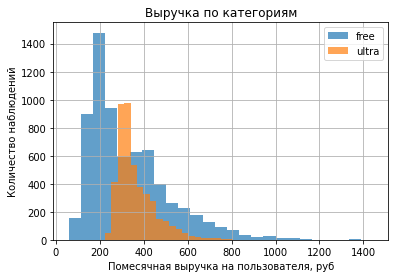

In [50]:
ax = user_month.query('subscription_type == "free"')['revenue'].plot(kind='hist', bins=25, linewidth=5, alpha=0.7, label='free')
user_month.query('subscription_type == "ultra"')['revenue'].plot(kind='hist', bins=25, linewidth=5, alpha=0.7, label='ultra', ax=ax, grid=True)
plt.title('Выручка по категориям')
plt.xlabel('Помесячная выручка на пользователя, руб')
plt.ylabel('Количество наблюдений')
plt.legend()

Для проверки гипотезы используем двухвыборочный t-тест для независимых выборок. По графику распределения выручки по категориям, видим, что данных по пользователям без подписки гораздо больше, чем по подписанным пользователям, а также центр выборки по пользователям с подпиской смещен вправо. Есть высокая вероятность, что дисперсии рассматриваемых выборок различны, поэтому в t-тесте параметру `equal_var` передадим значение `False`.

In [51]:
#выведем среднее значение для обеих выборок
print('Средняя выручка с подпиской:', np.mean(user_month.query('subscription_type == "ultra"')['revenue']))
print('Средняя выручка без подписки:', np.mean(user_month.query('subscription_type == "free"')['revenue']))

#зададим уровень статистической значимости
alpha = 0.05

#проверим нулевую гипотезу
results = st.ttest_ind(
    user_month.query('subscription_type == "ultra"')['revenue'],
    user_month.query('subscription_type == "free"')['revenue'],
    equal_var=False,
    alternative='greater'
)

#выведем вероятность при верной нулевой гипотезе получить наблюдаемое значение
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу в пользу альтернативной')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средняя выручка с подпиской: 362.7921906022502
Средняя выручка без подписки: 328.6413651073845
p-значение: 8.874140893976874e-40
Отвергаем нулевую гипотезу в пользу альтернативной


**Вывод:** Полученное значение p-value гораздо ниже заданного уровня значимости, поэтому отвергаем нулевую гипотезу в пользу альтернативной. Можно полагать, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

#### Общий вывод

В ходе предобработки данных привели колонки к корректному типу даты, обнаружили и устранили строки-дубликаты, убедились в отсутствии неявных дубликатов и аномальных значений. Обнаружили данные по пользователям в возрасте 12-17 лет, при том, что у сервисов проката действует возрастное ограничение, и арендовать электросамокат могут только совершеннолетние граждане. Вероятно, наличие таких данных техническая ошибка.

Данные по городам в выборке представлены достаточно равномерно. Наиболее часто встречаются данные по пользователям из Пятигорска - 219 раз, наименее представленный в выборке город (168 пользователей) - Москва.

Пользователи с подпиской составляют 46% выборки, пользователи без подписки - 54%.

Наибольшее количество пользователей самокатов (около 750 человек) - в возрасте 20-25 лет, примерно 500 пользователей в возрасте 25-35 лет, около 200 пользователей 15-20 лет, пользователей младше 15 и старше 35 лет крайне мало - около 50 человек в совокупности. 

Чаще всего пользователи преодолевают на самокате расстояние 3 км, поездки дальше 5 км стремятся к нулю. На графиках можно увидеть пик районе 500 м, вероятно, связанный с использованием самокатов как транспорта последней мили.

В среднем пользователи тратят на поездку от 10 до 25 минут. Максимальное значение составляет 41 минуту, что является вполне реалистичным значением, учитывая отсутствие ограничений по времени аренды и представленность в прокате самокатов с высокой емкостью батареи.

При фильтрации коротких поездок длительностью менее 2 минут, обнаружили, что 95 поездок длятся 30 секунд, при этом среднее расстояние для таких поездок больше 5 км. В реальности же самокат при максимальной разрешенной скорости 25 км/ч может проехать за это время 208 м - почти в 25 раз меньше. Очевидно, в этих строках приведены ошибочные данные по расстоянию или продолжительности поездки.

Создали новые датафреймы и рассчитали помесячную выручку по каждому пользователю для проверки гипотез.

В ходе проверки гипотез выявили, что:

- есть основания считать, что среднее время поездки пользователей с подпиской больше, чем среднее время поездки пользователей без подписки;

- среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров;

- можно полагать, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

**Рекомендации:**

- проверить данные в `users` на корректность для пользователей с указанным возрастом менее 18 лет;
- проверить длительность поездок со значением 0.5 минут в `rides`, в ходе исследования обнаружены ошибочны значения по длительности поездок в 30 секунд со средним расстоянием около 5 км.